# **1. IMPORT LIBRARY & DATA**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/MyDrive" 
# mount to google drive folder containing data

Mounted at /content/gdrive


In [3]:
import os
path = "/content/gdrive/MyDrive" 
print(os.path.isdir(path))
print(os.path.isfile("/content/gdrive/MyDrive/Colab Notebooks/K204141939_Uyên.xlsx"))
# check if the path exists or not

True
True


In [4]:
import pandas as pd #library for working with dataframes
import seaborn as sns #drawing
import numpy as np # library working with numbers
import matplotlib.pyplot as plt #drawing

In [5]:
data = pd.read_excel(r'/content/gdrive/MyDrive/Colab Notebooks/K204141939_Uyên.xlsx')

In [6]:
data

,ID Khách hàng,Khả năng trả nợ,"Giới tính (0: Nam, 1: Nữ)",Hoá đơn tiền điện,Số tiền vay (triệu đồng),Thu nhập (triệu đồng/tháng),Mục đích vay,Tình trạng hôn nhân,Tình trạng công việc (năm),Độ tuổi khách hàng,Lịch sử tín dụng,Tài sản đảm bảo,Kỳ hạn vay (tháng)
0,1,0: Trả nợ đúng hạn,1,300000,300,32,5: Đầu tư chứng khoán,1: Độc Thân,6,28,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,18
1,2,1: Trả nợ trễ hạn,1,600000,120,14,1: Tiêu dùng,1: Độc Thân,3,26,2: Từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,12
2,3,0: Trả nợ đúng hạn,0,500000,500,80,2: Mua nhà,2: Có gia đình,8,32,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,24
3,4,0: Trả nợ đúng hạn,1,400000,40,8,4: Học tập,1: Độc Thân,2,24,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,12
4,5,1: Trả nợ trễ hạn,0,500000,150,20,5: Đầu tư chứng khoán,3: Ly hôn,2,32,2: Từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,0: Trả nợ đúng hạn,0,600000,70,18,1: Tiêu dùng,1: Độc Thân,15,26,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,24
1271,1272,0: Trả nợ đúng hạn,1,600000,500,60,3: Mua xe,2: Có gia đình,7,28,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,12
1272,1273,0: Trả nợ đúng hạn,0,300000,100,32,5: Đầu tư chứng khoán,1: Độc Thân,8,25,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,24
1273,1274,0: Trả nợ đúng hạn,0,400000,50,20,4: Học tập,3: Ly hôn,7,34,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,18


# **2. PRE-PROCESSING DATA**

In [7]:
data['Khả năng trả nợ'].value_counts() 

0: Trả nợ đúng hạn    726
1: Trả nợ trễ hạn     549
Name: Khả năng trả nợ, dtype: int64

In [8]:
data= data.drop(columns=['ID Khách hàng', 'Giới tính (0: Nam, 1: Nữ)'])

In [9]:
data=data.rename(columns = {'Khả năng trả nợ':'Kha nang tra no','Hoá đơn tiền điện':'Hoa don tien dien',
                        'Số tiền vay (triệu đồng)':'So tien vay','Thu nhập (triệu đồng/tháng)':'Thu nhap',
                        'Mục đích vay':'Muc dich vay','Tình trạng hôn nhân':'Tinh trang hon nhan',
                        'Tình trạng công việc (năm)':'Tinh trang cong viec','Độ tuổi khách hàng':'Do tuoi',
                        'Lịch sử tín dụng':'Lich su tin dung','Tài sản đảm bảo':'Tai san dam bao',
                        'Kỳ hạn vay (tháng)':'Ky han vay'
                       })
data.head(5)

,Kha nang tra no,Hoa don tien dien,So tien vay,Thu nhap,Muc dich vay,Tinh trang hon nhan,Tinh trang cong viec,Do tuoi,Lich su tin dung,Tai san dam bao,Ky han vay
0,0: Trả nợ đúng hạn,300000,300,32,5: Đầu tư chứng khoán,1: Độc Thân,6,28,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,18
1,1: Trả nợ trễ hạn,600000,120,14,1: Tiêu dùng,1: Độc Thân,3,26,2: Từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,12
2,0: Trả nợ đúng hạn,500000,500,80,2: Mua nhà,2: Có gia đình,8,32,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,24
3,0: Trả nợ đúng hạn,400000,40,8,4: Học tập,1: Độc Thân,2,24,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,12
4,1: Trả nợ trễ hạn,500000,150,20,5: Đầu tư chứng khoán,3: Ly hôn,2,32,2: Từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,12


# **3. DESCRPTIVE STATISTICS**

In [10]:
from copy import deepcopy
data_2 = deepcopy(data) 

####**A. Summary and Statistical Analysis of a Dataset**

In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Kha nang tra no       1275 non-null   object
 1   Hoa don tien dien     1275 non-null   int64 
 2   So tien vay           1275 non-null   int64 
 3   Thu nhap              1275 non-null   int64 
 4   Muc dich vay          1275 non-null   object
 5   Tinh trang hon nhan   1275 non-null   object
 6   Tinh trang cong viec  1275 non-null   int64 
 7   Do tuoi               1275 non-null   int64 
 8   Lich su tin dung      1275 non-null   object
 9   Tai san dam bao       1275 non-null   object
 10  Ky han vay            1275 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 109.7+ KB


In [12]:
numerical_features = ['Hoa don tien dien', 'So tien vay','Thu nhap','Tinh trang cong viec','Do tuoi','Ky han vay']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  6


In [13]:
categorical_features = [x for x in data.columns if (x not in numerical_features) and x != 'Kha nang tra no']
print('Number of numerical features: ', len(categorical_features))

Number of numerical features:  4


In [14]:
for col in categorical_features:
    data_2[col] = data_2[col].astype('object')

In [15]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Kha nang tra no       1275 non-null   object
 1   Hoa don tien dien     1275 non-null   int64 
 2   So tien vay           1275 non-null   int64 
 3   Thu nhap              1275 non-null   int64 
 4   Muc dich vay          1275 non-null   object
 5   Tinh trang hon nhan   1275 non-null   object
 6   Tinh trang cong viec  1275 non-null   int64 
 7   Do tuoi               1275 non-null   int64 
 8   Lich su tin dung      1275 non-null   object
 9   Tai san dam bao       1275 non-null   object
 10  Ky han vay            1275 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 109.7+ KB


In [16]:
data_2[numerical_features].describe()

,Hoa don tien dien,So tien vay,Thu nhap,Tinh trang cong viec,Do tuoi,Ky han vay
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,538000.000000,213.231373,35.668235,4.687843,28.838431,14.600784
std,202866.816052,193.442512,27.482529,3.270121,6.009197,7.004585
min,200000.000000,20.000000,6.000000,1.000000,17.000000,6.000000
25%,400000.000000,80.000000,15.000000,2.000000,25.000000,9.000000
50%,500000.000000,120.000000,25.000000,4.000000,28.000000,12.000000
75%,700000.000000,300.000000,40.000000,7.000000,34.000000,18.000000
max,1000000.000000,800.000000,120.000000,15.000000,45.000000,36.000000


In [17]:
data_2[categorical_features].describe()

,Muc dich vay,Tinh trang hon nhan,Lich su tin dung,Tai san dam bao
count,1275,1275,1275,1275
unique,5,4,2,4
top,5: Đầu tư chứng khoán,1: Độc Thân,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo
freq,304,665,709,413


In [18]:
for i in data_2.columns:
    data_2[i] = data_2[i].apply(lambda x: str(x).split(':')[0]) 
    data_2[i] = data_2[i].apply(lambda x: int(x))
data_2

,Kha nang tra no,Hoa don tien dien,So tien vay,Thu nhap,Muc dich vay,Tinh trang hon nhan,Tinh trang cong viec,Do tuoi,Lich su tin dung,Tai san dam bao,Ky han vay
0,0,300000,300,32,5,1,6,28,1,2,18
1,1,600000,120,14,1,1,3,26,2,3,12
2,0,500000,500,80,2,2,8,32,1,2,24
3,0,400000,40,8,4,1,2,24,1,3,12
4,1,500000,150,20,5,3,2,32,2,2,12
...,...,...,...,...,...,...,...,...,...,...,...
1270,0,600000,70,18,1,1,15,26,1,3,24
1271,0,600000,500,60,3,2,7,28,1,3,12
1272,0,300000,100,32,5,1,8,25,1,3,24
1273,0,400000,50,20,4,3,7,34,1,3,18


####**B. Correlation**

In [19]:
data_2.corr()

,Kha nang tra no,Hoa don tien dien,So tien vay,Thu nhap,Muc dich vay,Tinh trang hon nhan,Tinh trang cong viec,Do tuoi,Lich su tin dung,Tai san dam bao,Ky han vay
Kha nang tra no,1.000000,0.489263,0.013893,-0.406999,0.138771,0.100895,-0.271175,-0.159613,0.450429,-0.033378,0.103648
Hoa don tien dien,0.489263,1.000000,0.325907,-0.110979,-0.125627,0.169798,0.015824,0.200039,0.211675,-0.045028,0.091746
So tien vay,0.013893,0.325907,1.000000,0.417091,0.045084,0.238134,0.209622,0.389695,0.029724,-0.035912,0.403768
Thu nhap,-0.406999,-0.110979,0.417091,1.000000,-0.071897,0.267859,0.340676,0.385053,-0.129130,0.003403,0.011487
Muc dich vay,0.138771,-0.125627,0.045084,-0.071897,1.000000,0.101254,-0.036286,0.061584,0.051181,0.004388,0.102146
Tinh trang hon nhan,0.100895,0.169798,0.238134,0.267859,0.101254,1.000000,0.342507,0.517219,0.088415,-0.048551,0.111451
Tinh trang cong viec,-0.271175,0.015824,0.209622,0.340676,-0.036286,0.342507,1.000000,0.372624,-0.139718,-0.036100,0.145504
Do tuoi,-0.159613,0.200039,0.389695,0.385053,0.061584,0.517219,0.372624,1.000000,-0.091862,-0.061784,0.054951
Lich su tin dung,0.450429,0.211675,0.029724,-0.129130,0.051181,0.088415,-0.139718,-0.091862,1.000000,0.023494,0.007881
Tai san dam bao,-0.033378,-0.045028,-0.035912,0.003403,0.004388,-0.048551,-0.036100,-0.061784,0.023494,1.000000,0.015471


In [20]:
pd.DataFrame(data_2.corr().iloc[0:,1])

,Hoa don tien dien
Kha nang tra no,0.489263
Hoa don tien dien,1.000000
So tien vay,0.325907
Thu nhap,-0.110979
Muc dich vay,-0.125627
Tinh trang hon nhan,0.169798
Tinh trang cong viec,0.015824
Do tuoi,0.200039
Lich su tin dung,0.211675
Tai san dam bao,-0.045028


In [21]:
correlation = data_2.corr().iloc[1:,0].values
# np.absolute(correlation)

In [22]:
column_selected = [x for x in data_2.columns if (x != 'Kha nang tra no')]
column_selected

['Hoa don tien dien',
 'So tien vay',
 'Thu nhap',
 'Muc dich vay',
 'Tinh trang hon nhan',
 'Tinh trang cong viec',
 'Do tuoi',
 'Lich su tin dung',
 'Tai san dam bao',
 'Ky han vay']

In [23]:
features_importances_corr = pd.DataFrame({'FeatureName': data_2[column_selected].columns[0:len(data_2[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

,FeatureName,Pearson Correlation with target
0,Hoa don tien dien,0.489263
7,Lich su tin dung,0.450429
2,Thu nhap,-0.406999
5,Tinh trang cong viec,-0.271175
6,Do tuoi,-0.159613
3,Muc dich vay,0.138771
9,Ky han vay,0.103648
4,Tinh trang hon nhan,0.100895
8,Tai san dam bao,-0.033378
1,So tien vay,0.013893


<Axes: ylabel='FeatureName'>

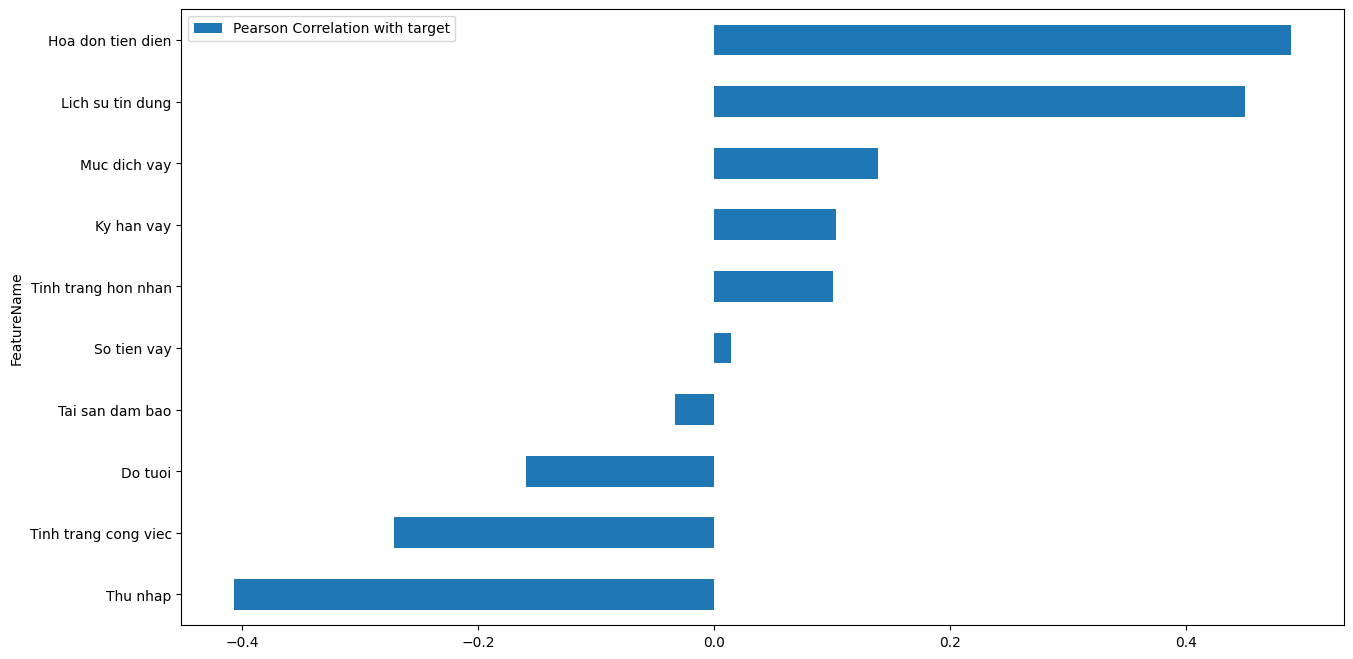

In [24]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

In [25]:
from sklearn.metrics import roc_curve, auc

In [26]:
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [27]:
corr = data_2.corr()
corr.style.background_gradient(cmap='Reds')

,Kha nang tra no,Hoa don tien dien,So tien vay,Thu nhap,Muc dich vay,Tinh trang hon nhan,Tinh trang cong viec,Do tuoi,Lich su tin dung,Tai san dam bao,Ky han vay
Kha nang tra no,1.000000,0.489263,0.013893,-0.406999,0.138771,0.100895,-0.271175,-0.159613,0.450429,-0.033378,0.103648
Hoa don tien dien,0.489263,1.000000,0.325907,-0.110979,-0.125627,0.169798,0.015824,0.200039,0.211675,-0.045028,0.091746
So tien vay,0.013893,0.325907,1.000000,0.417091,0.045084,0.238134,0.209622,0.389695,0.029724,-0.035912,0.403768
Thu nhap,-0.406999,-0.110979,0.417091,1.000000,-0.071897,0.267859,0.340676,0.385053,-0.129130,0.003403,0.011487
Muc dich vay,0.138771,-0.125627,0.045084,-0.071897,1.000000,0.101254,-0.036286,0.061584,0.051181,0.004388,0.102146
Tinh trang hon nhan,0.100895,0.169798,0.238134,0.267859,0.101254,1.000000,0.342507,0.517219,0.088415,-0.048551,0.111451
Tinh trang cong viec,-0.271175,0.015824,0.209622,0.340676,-0.036286,0.342507,1.000000,0.372624,-0.139718,-0.036100,0.145504
Do tuoi,-0.159613,0.200039,0.389695,0.385053,0.061584,0.517219,0.372624,1.000000,-0.091862,-0.061784,0.054951
Lich su tin dung,0.450429,0.211675,0.029724,-0.129130,0.051181,0.088415,-0.139718,-0.091862,1.000000,0.023494,0.007881
Tai san dam bao,-0.033378,-0.045028,-0.035912,0.003403,0.004388,-0.048551,-0.036100,-0.061784,0.023494,1.000000,0.015471


####**C. Data visualization**

Text(0.5, 1.0, 'Thong ke do tuoi \n (0: Nam || 1: Nu)')

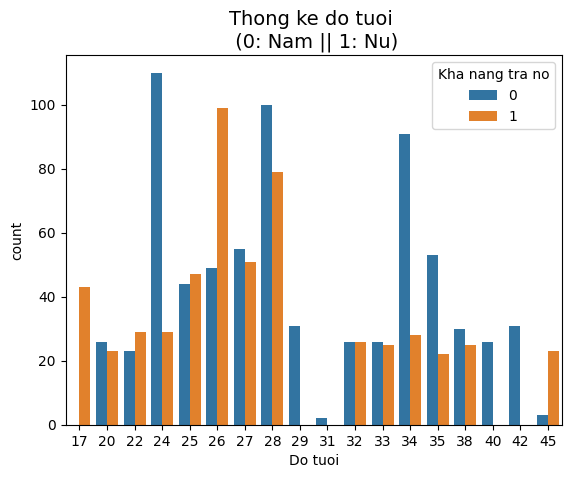

In [28]:
sns.countplot(x='Do tuoi',hue='Kha nang tra no',data=data_2)
plt.title('Thong ke do tuoi \n (0: Nam || 1: Nu)', fontsize=14)

Text(0.5, 1.0, 'Thong ke lich su tin dung \n (1: Chua tung phat sinh NQH || 2: Tung phat sinh NQH)')

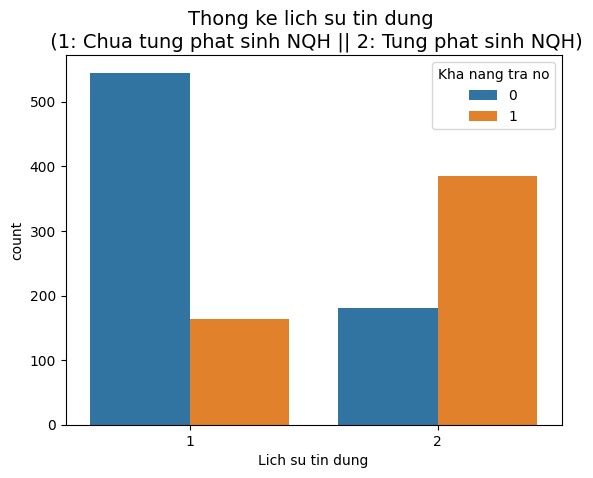

In [29]:
sns.countplot(x='Lich su tin dung',hue='Kha nang tra no',data=data_2)
plt.title('Thong ke lich su tin dung \n (1: Chua tung phat sinh NQH || 2: Tung phat sinh NQH)', fontsize=14)

Text(0.5, 1.0, 'Thong ke tai san dam bao \n (1: Co du tai san dam bao cua ban than || 2: Co du tai san dam bao dc bao lanh || 3: Co 1 phan tai san dam bao  || 4: Khong co tai san dam bao)')

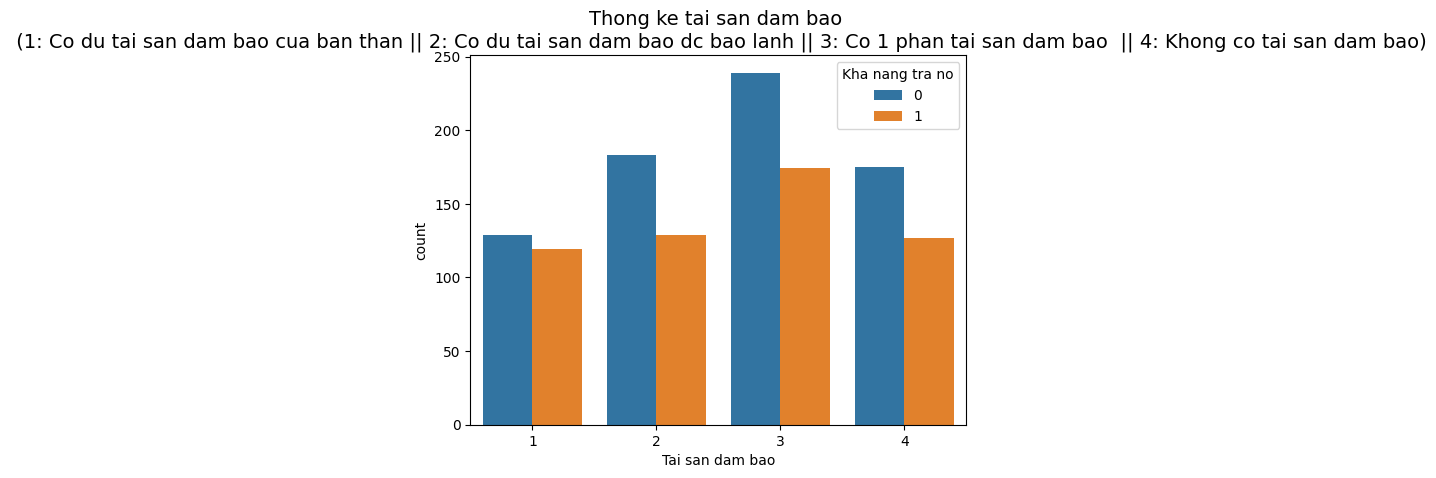

In [30]:
sns.countplot(x='Tai san dam bao',hue='Kha nang tra no',data=data_2)
plt.title('Thong ke tai san dam bao \n (1: Co du tai san dam bao cua ban than || 2: Co du tai san dam bao dc bao lanh || 3: Co 1 phan tai san dam bao  || 4: Khong co tai san dam bao)', fontsize=14)

Text(0.5, 1.0, 'Thong ke tinh trang hon nhan \n (1: Doc than || 2: Co gia dinh || 3: Ly hon || 4: Goa)')

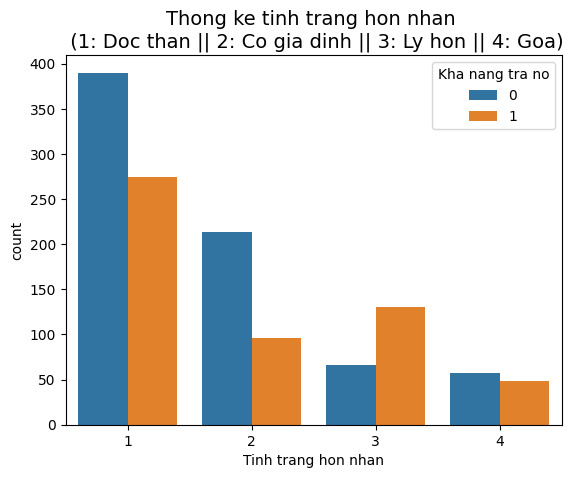

In [31]:
sns.countplot(x='Tinh trang hon nhan',hue='Kha nang tra no',data=data_2)
plt.title('Thong ke tinh trang hon nhan \n (1: Doc than || 2: Co gia dinh || 3: Ly hon || 4: Goa)', fontsize=14)

<ipython-input-32-accaf5aa4814>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Do_tuoi_val, ax=ax[0])
<ipython-input-32-accaf5aa4814>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tinh_trang_cong_viec_val, ax=ax[1])
<ipython-input-32-accaf5aa4814>:18: UserWarning: 

`distplot` is a deprec

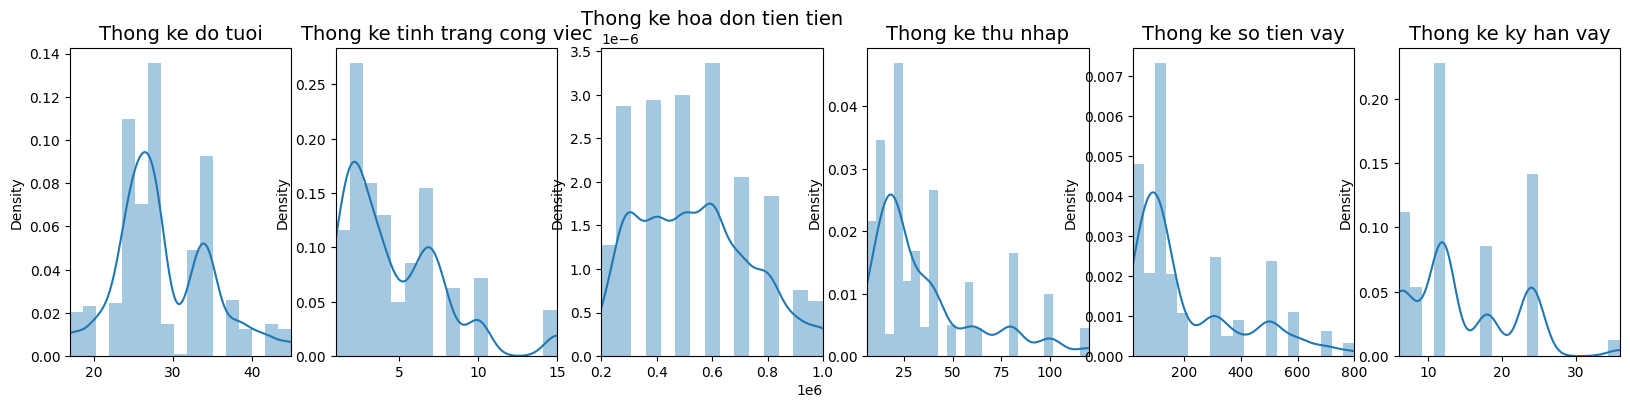

In [32]:
fig, ax = plt.subplots(ncols=6, figsize=(20,4))

Do_tuoi_val = data_2['Do tuoi'].values
Tinh_trang_cong_viec_val = data_2['Tinh trang cong viec'].values
Hoa_don_tien_dien_val = data_2['Hoa don tien dien'].values
Thu_nhap_val = data_2['Thu nhap'].values
So_tien_vay_val = data_2['So tien vay'].values
Ky_han_vay_val = data_2['Ky han vay'].values

sns.distplot(Do_tuoi_val, ax=ax[0])
ax[0].set_title('Thong ke do tuoi', fontsize=14)
ax[0].set_xlim([min(Do_tuoi_val), max(Do_tuoi_val)])

sns.distplot(Tinh_trang_cong_viec_val, ax=ax[1])
ax[1].set_title('Thong ke tinh trang cong viec', fontsize=14)
ax[1].set_xlim([min(Tinh_trang_cong_viec_val), max(Tinh_trang_cong_viec_val)])

sns.distplot(Hoa_don_tien_dien_val, ax=ax[2])
ax[2].set_title('Thong ke hoa don tien tien', fontsize=14)
ax[2].set_xlim([min(Hoa_don_tien_dien_val), max(Hoa_don_tien_dien_val)])

sns.distplot(Thu_nhap_val, ax=ax[3])
ax[3].set_title('Thong ke thu nhap', fontsize=14)
ax[3].set_xlim([min(Thu_nhap_val), max(Thu_nhap_val)])

sns.distplot(So_tien_vay_val, ax=ax[4])
ax[4].set_title('Thong ke so tien vay', fontsize=14)
ax[4].set_xlim([min(So_tien_vay_val), max(So_tien_vay_val)])

sns.distplot(Ky_han_vay_val, ax=ax[5])
ax[5].set_title('Thong ke ky han vay', fontsize=14)
ax[5].set_xlim([min(Ky_han_vay_val), max(Ky_han_vay_val)])

plt.show()

# **4. MODEL**

In [33]:
target = ['Kha nang tra no']
features =  ['Lich su tin dung','Tinh trang hon nhan','Muc dich vay','Tinh trang cong viec','Tai san dam bao']
print('Target: ', target)
print('Features: ', features)

Target:  ['Kha nang tra no']
Features:  ['Lich su tin dung', 'Tinh trang hon nhan', 'Muc dich vay', 'Tinh trang cong viec', 'Tai san dam bao']


#### **A. Logistic Regression**

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [35]:
# Hàm vẽ đường ROC-AUC
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [36]:
X = data_2[features].values
y = data_2[target].values
n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42)

In [37]:
X

array([[1, 1, 5, 6, 2],
       [2, 1, 1, 3, 3],
       [1, 2, 2, 8, 2],
       ...,
       [1, 1, 5, 8, 3],
       [1, 3, 4, 7, 3],
       [2, 1, 3, 3, 4]])

In [38]:
# Build Logistic regression model
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

# Input X_train and y_train values ​​into Logistic regression model
LR_classifier.fit(X_train, y_train.ravel())

# Forecast dependent variable value value
y_pred = LR_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
    0   1
0  58  18
1  14  38 

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        76
           1       0.68      0.73      0.70        52

    accuracy                           0.75       128
   macro avg       0.74      0.75      0.74       128
weighted avg       0.75      0.75      0.75       128

Logistic Regression accuracy:  0.75


In [39]:
import statsmodels.api as SM

model_1 = SM.Logit(y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.563549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1147
Model:                          Logit   Df Residuals:                     1142
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.1764
Time:                        14:18:52   Log-Likelihood:                -646.39
converged:                       True   LL-Null:                       -784.80
Covariance Type:            nonrobust   LLR p-value:                 1.076e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1503      0.118      9.783      0.000       0.920       1.381
x2             0.2933      0.

<ipython-input-35-f149c499526e>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-f149c499526e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


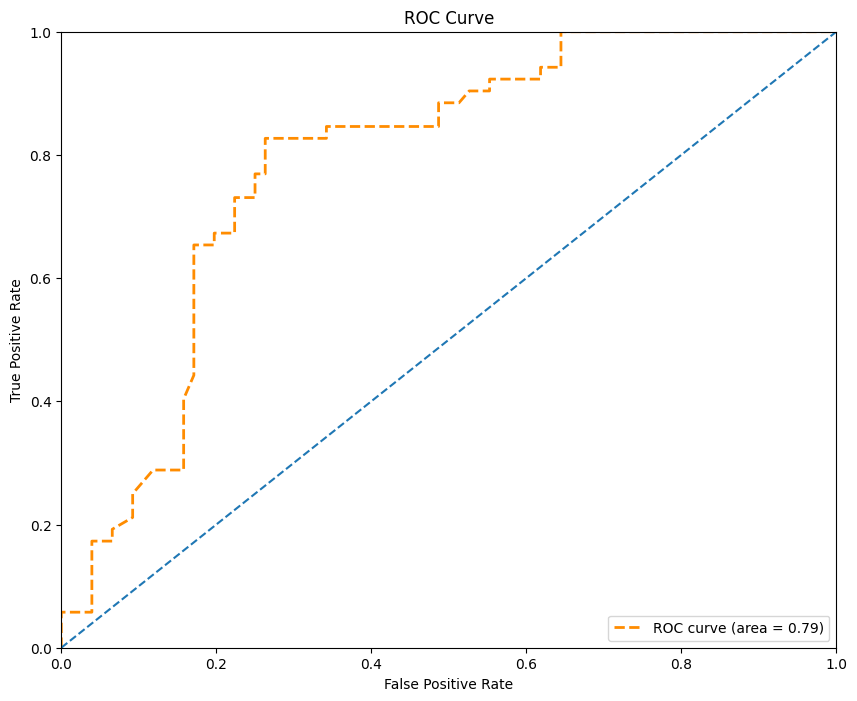

In [40]:
# ROC
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)

roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#### **B. Decision Free**

In [41]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_train, y_pred),2))


Confusion matrix:
     0    1
0  616   34
1   33  464 

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       650
           1       0.93      0.93      0.93       497

    accuracy                           0.94      1147
   macro avg       0.94      0.94      0.94      1147
weighted avg       0.94      0.94      0.94      1147

Decision Tree accuracy:  0.94


In [42]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),2))

Confusion matrix:
    0   1
0  68   8
1   3  49 

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        76
           1       0.86      0.94      0.90        52

    accuracy                           0.91       128
   macro avg       0.91      0.92      0.91       128
weighted avg       0.92      0.91      0.91       128

Decision Tree accuracy:  0.91


In [43]:
X_plot_tree = data_2[features]

In [44]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data_2.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
3,Tinh trang cong viec,0.377935
0,Lich su tin dung,0.238636
2,Muc dich vay,0.194055
1,Tinh trang hon nhan,0.178233
4,Tai san dam bao,0.011141


<Axes: ylabel='FeatureName'>

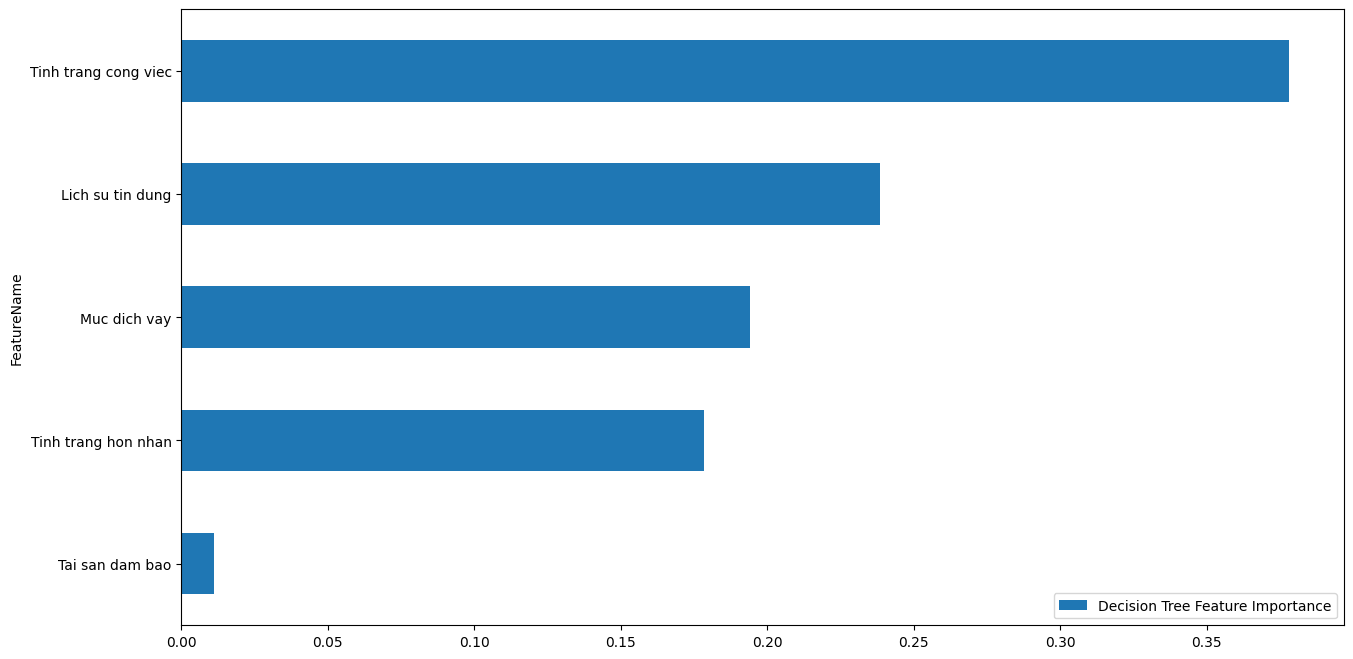

In [45]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

In [46]:
pd.DataFrame(data_2.corr().iloc[1:,0])

,Kha nang tra no
Hoa don tien dien,0.489263
So tien vay,0.013893
Thu nhap,-0.406999
Muc dich vay,0.138771
Tinh trang hon nhan,0.100895
Tinh trang cong viec,-0.271175
Do tuoi,-0.159613
Lich su tin dung,0.450429
Tai san dam bao,-0.033378
Ky han vay,0.103648


In [47]:
X_plot_tree = data_2[features]

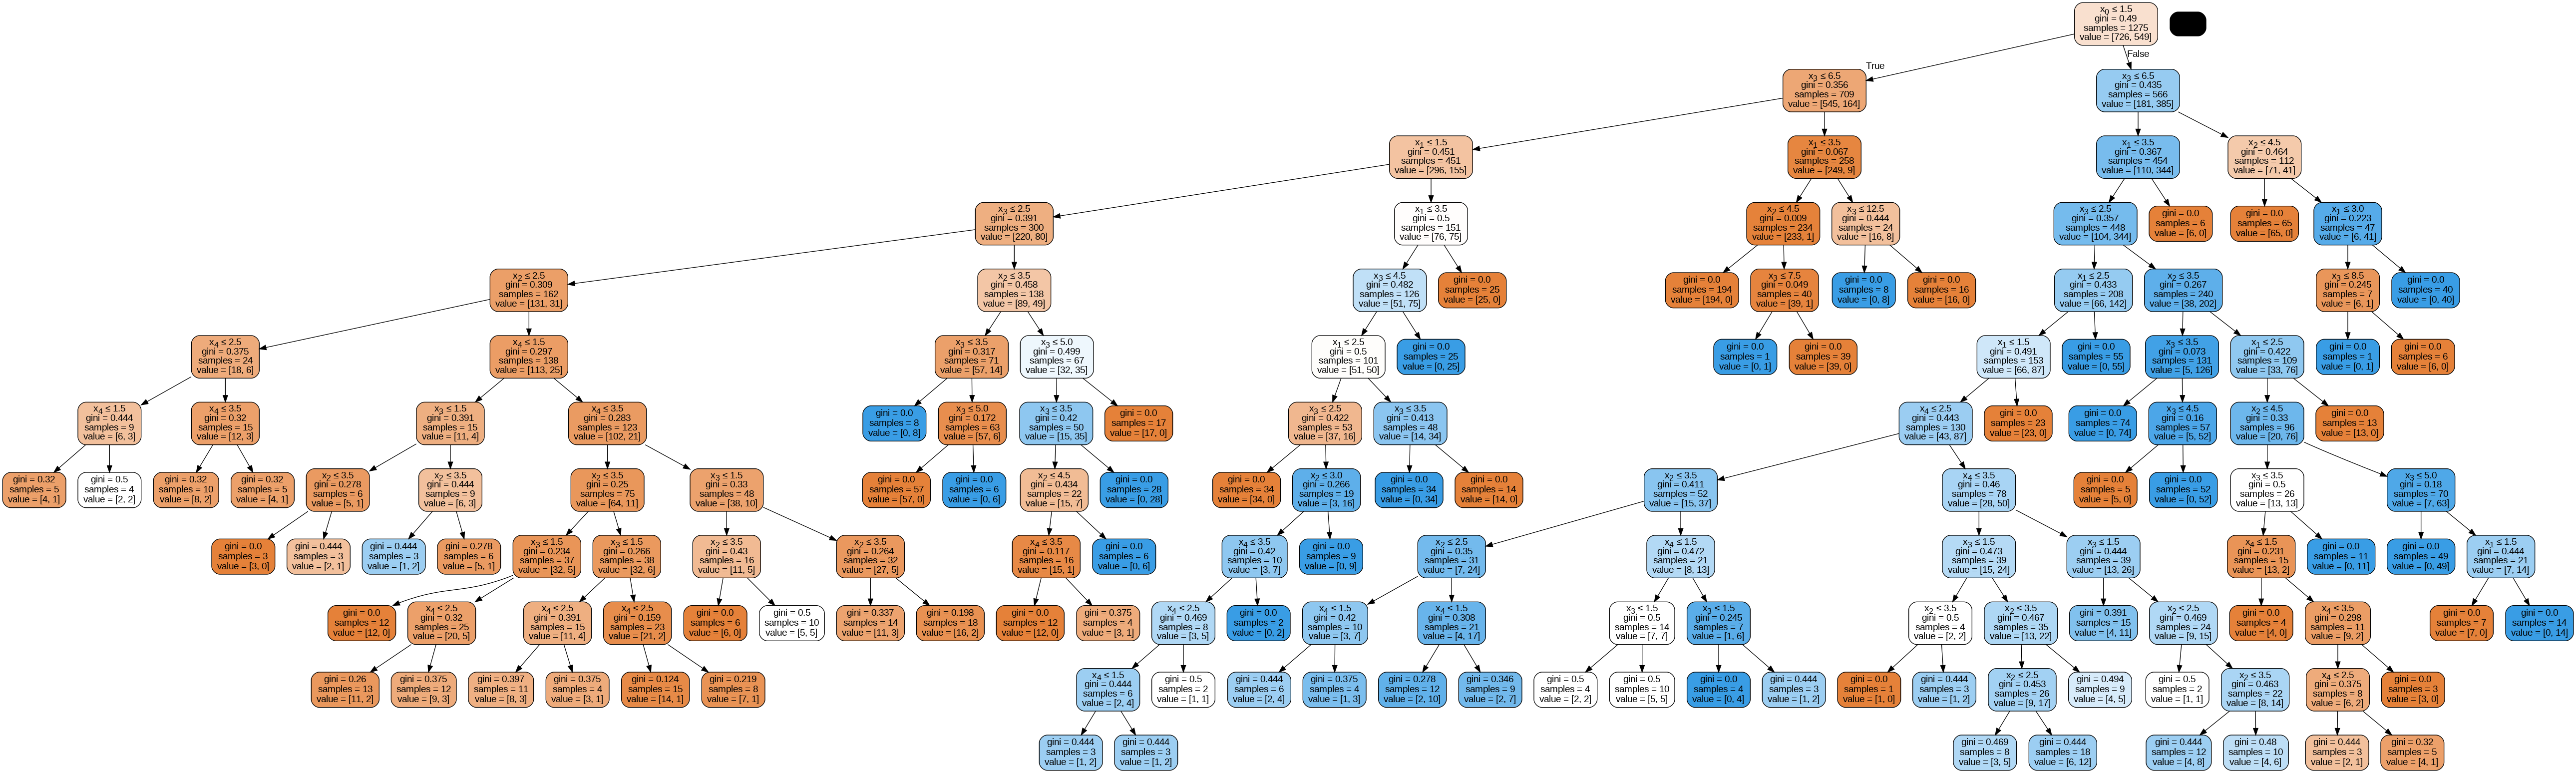

In [48]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from graphviz import Digraph

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Note:Class 0 is on-time and class 1 is late payment


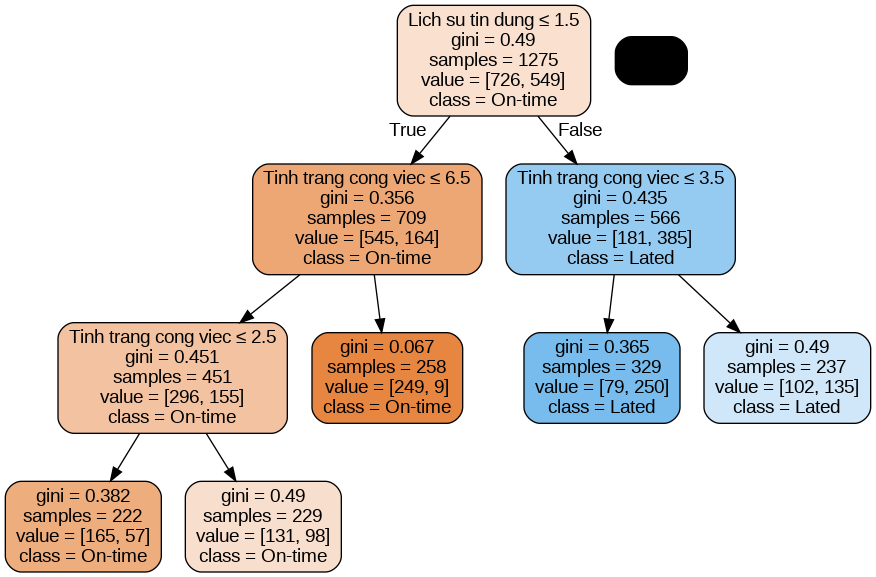

In [49]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier(max_depth=5 , min_samples_leaf=200)#(max_depth=5 , min_samples_leaf=190) #max_depth=5 , min_samples_leaf=200
clf.fit(X_plot_tree.values, y.ravel())
print('Note:Class 0 is on-time and class 1 is late payment')
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=features,
                class_names=['On-time','Lated'], 
                filled=True,
                rounded=True, 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [50]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: Lich su tin dung
X_1: Tinh trang hon nhan
X_2: Muc dich vay
X_3: Tinh trang cong viec
X_4: Tai san dam bao


###**C. Random Forest**


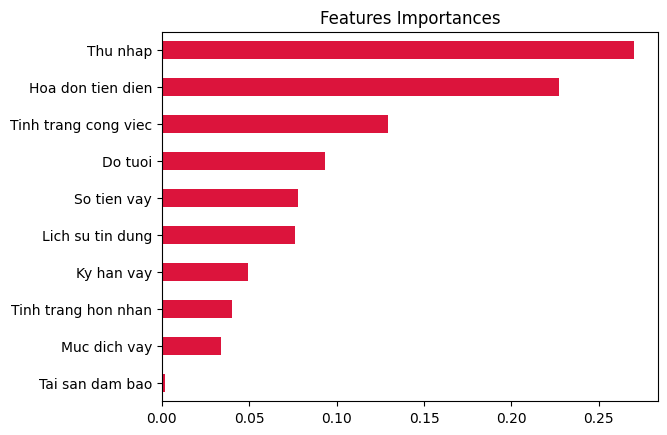

In [51]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
X = data_2.drop('Kha nang tra no', axis=1)
y = data_2['Kha nang tra no']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
# Lấy độ quan trọng của các tính năng
importances = pd.Series(rf.feature_importances_, index=X.columns)
# Sắp xếp theo thứ tự giảm dần và hiển thị kết quả
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='Crimson')
plt.title('Features Importances')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

In [53]:
target = ['Kha nang tra no']
features = list(set(list(data_2.columns)) - set(target))

In [54]:
X = data_2[features].values
y = data_2[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [55]:
# Xây dựng mô hình Random Forest
RF_classifier = RandomForestClassifier()

# Đưa giá trị X_train và y_train vào mô hình Random Forest
RF_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = RF_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
     0    1
0  186    0
1    0  133 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       133

    accuracy                           1.00       319
   macro avg       1.00      1.00      1.00       319
weighted avg       1.00      1.00      1.00       319

Random Forest accuracy:  1.0


In [56]:
# Xây dựng mô hình Random Forest
RF_classifier = RandomForestClassifier()

# Đưa giá trị X_train và y_train vào mô hình Random Forest
RF_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = RF_classifier.predict(X_train)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Random Forest accuracy: ', accuracy_score(y_train, y_pred))

Confusion matrix:
     0    1
0  540    0
1    0  416 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       540
           1       1.00      1.00      1.00       416

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

Random Forest accuracy:  1.0


In [57]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data_2.columns[0:len(data_2.columns)-1], 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
5,Tinh trang hon nhan,0.282899
6,Tinh trang cong viec,0.216758
2,So tien vay,0.121922
7,Do tuoi,0.088473
0,Kha nang tra no,0.087050
9,Tai san dam bao,0.077345
1,Hoa don tien dien,0.046762
3,Thu nhap,0.042811
8,Lich su tin dung,0.034870
4,Muc dich vay,0.001109


<Axes: ylabel='FeatureName'>

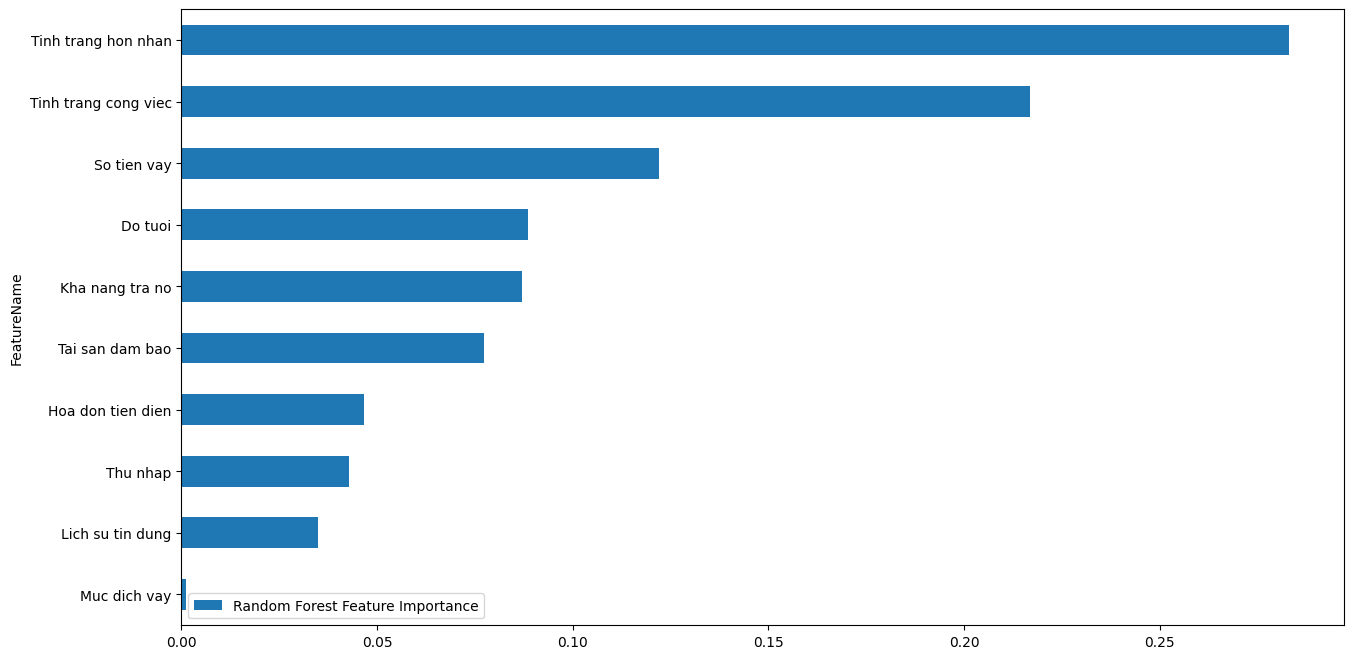

In [58]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

<ipython-input-35-f149c499526e>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-f149c499526e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


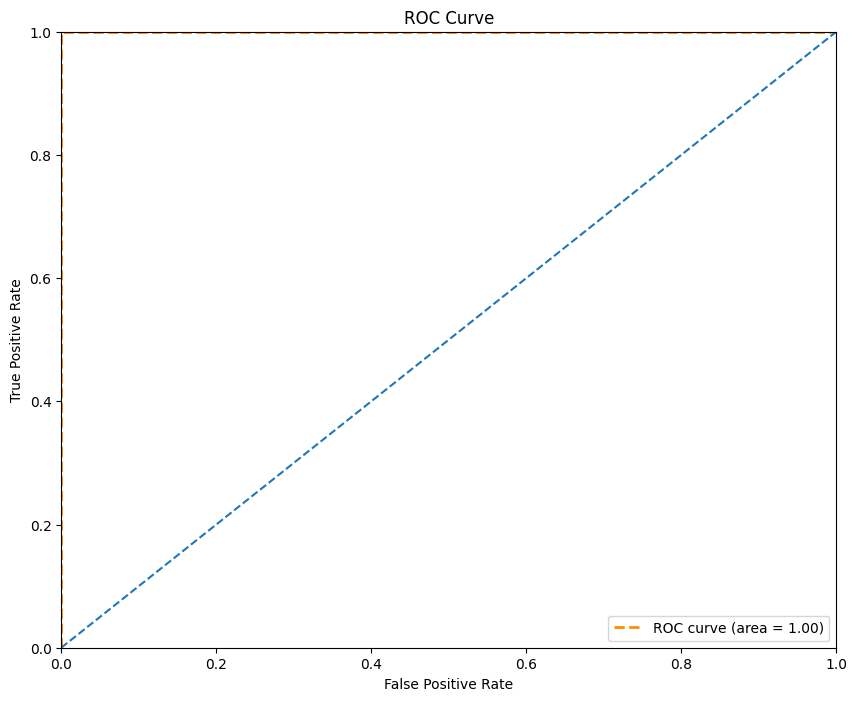

In [59]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

###**D. SVM**


In [60]:
from sklearn.svm import SVC

In [61]:
from sklearn.model_selection import train_test_split

# Tách tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Xây dựng mô hình SVM
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

# Đưa giá trị X_train và y_train vào mô hình SVM
SVM_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc trên tập huấn luyện
y_pred_train = SVM_classifier.predict(X_train)

# Đánh giá kết quả trên tập huấn luyện
print('Confusion matrix on training set:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred_train)),'\n')
print('Classification report on training set:')
print(classification_report(y_train,y_pred_train))
print('SVM accuracy on training set: ', accuracy_score(y_train, y_pred_train))

Confusion matrix on training set:
     0    1
0  408  165
1   53  394 

Classification report on training set:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       573
           1       0.70      0.88      0.78       447

    accuracy                           0.79      1020
   macro avg       0.79      0.80      0.79      1020
weighted avg       0.81      0.79      0.79      1020

SVM accuracy on training set:  0.7862745098039216


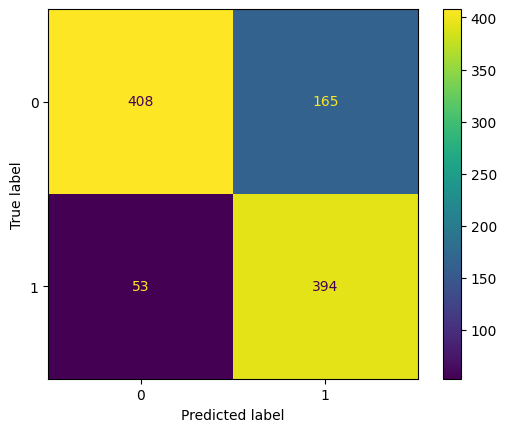

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(SVM_classifier, X_train, y_train)

In [63]:
# Xây dựng mô hình SVM
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

# Đưa giá trị X_train và y_train vào mô hình SVM
SVM_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = SVM_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('SVM accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
     0   1
0  109  44
1   15  87 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       153
           1       0.66      0.85      0.75       102

    accuracy                           0.77       255
   macro avg       0.77      0.78      0.77       255
weighted avg       0.79      0.77      0.77       255

SVM accuracy:  0.7686274509803922


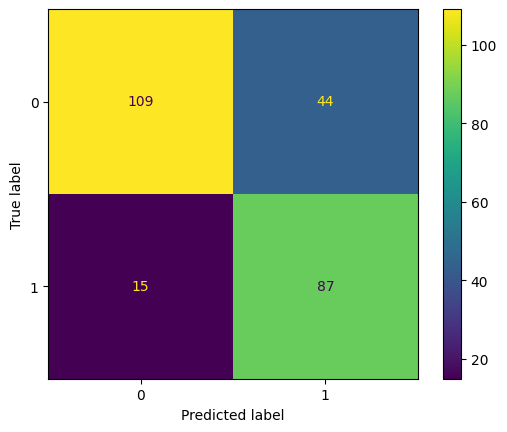

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(SVM_classifier, X_test, y_test)

###**E. XGB Classifier**


In [65]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# khởi tạo mô hình XGBoost
XGB_classifier = XGBClassifier()

# chuyển y_train thành một mảng 1 chiều
y_train = y_train.ravel()

# huấn luyện mô hình trên tập huấn luyện
XGB_classifier.fit(X_train, y_train)

# dự đoán nhãn trên tập huấn luyện
y_pred = XGB_classifier.predict(X_train)

# đánh giá kết quả
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('XGBoost accuracy: ', accuracy_score(y_train, y_pred))

[[573   0]
 [  0 447]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       447

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020

XGBoost accuracy:  1.0


In [68]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[153   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       102

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255

XGBoost accuracy:  1.0


In [69]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': data_2.loc[:,features].columns, 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

,FeatureName,XGBoost Feature Importance
5,Thu nhap,0.272798
6,Hoa don tien dien,0.261341
0,Do tuoi,0.145237
3,Tinh trang hon nhan,0.124275
2,Tinh trang cong viec,0.102561
1,Ky han vay,0.063784
7,Lich su tin dung,0.013213
9,So tien vay,0.008247
8,Muc dich vay,0.008214
4,Tai san dam bao,0.000329


<Axes: ylabel='FeatureName'>

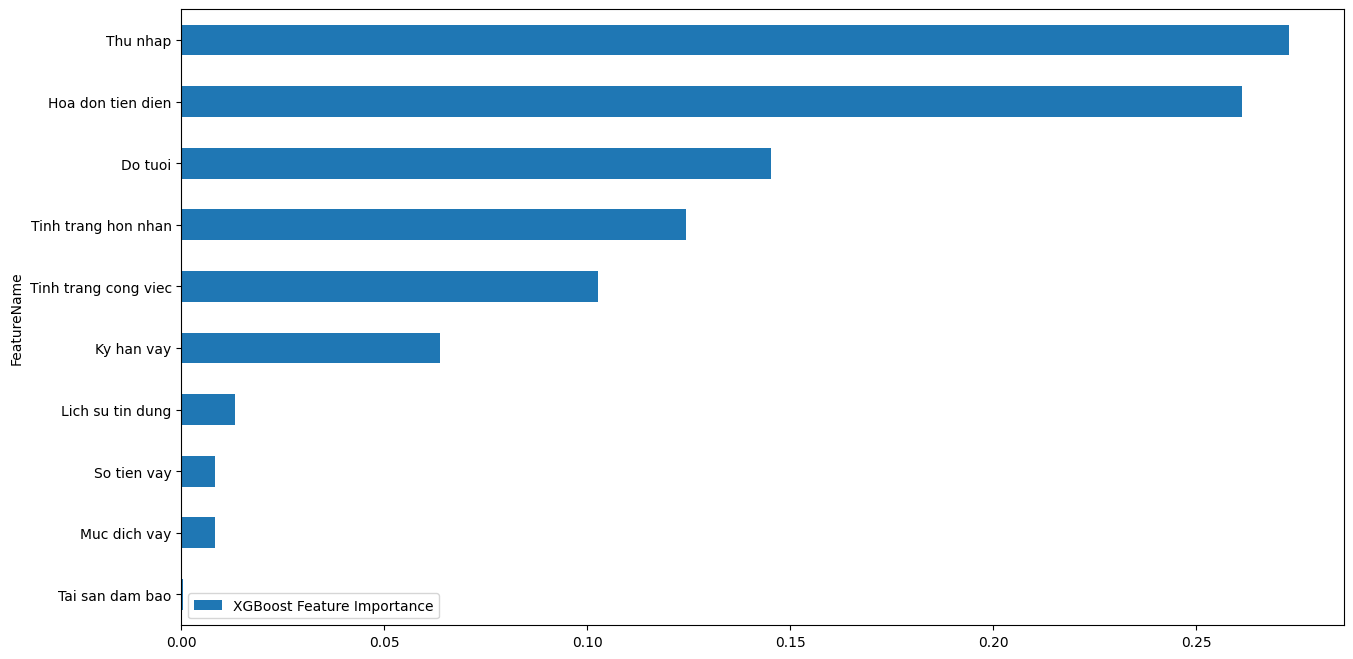

In [70]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

<ipython-input-35-f149c499526e>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-f149c499526e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


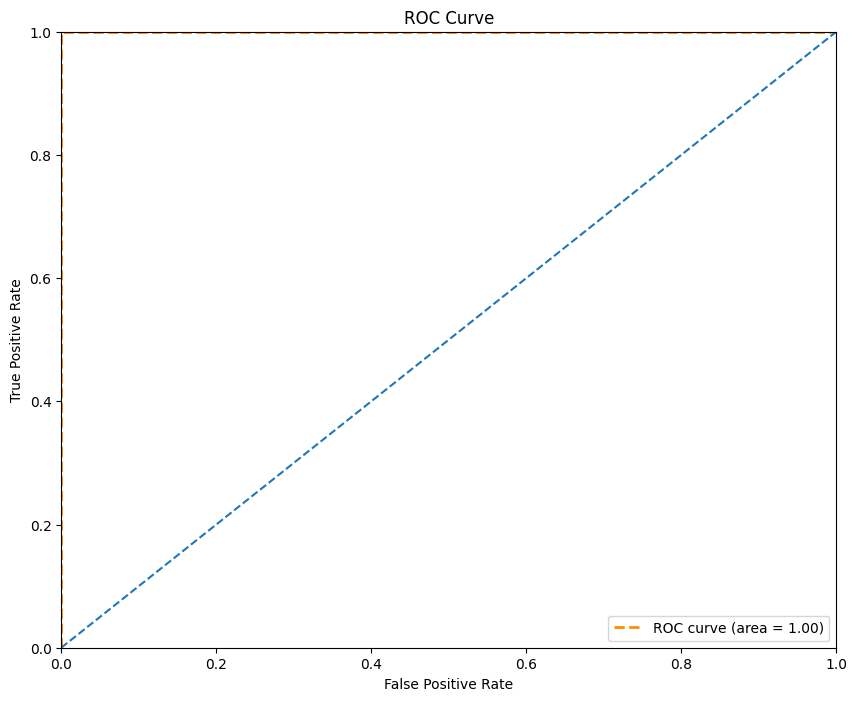

In [71]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

###**F. Ada Boost Classifier**


In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())

y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[153   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       102

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255

XGBoost accuracy:  1.0


In [74]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())

y_pred = ada_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_train, y_pred))

[[573   0]
 [  0 447]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       447

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020

XGBoost accuracy:  1.0


In [75]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': data_2.columns[0:len(data_2.columns)-1], 'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

,FeatureName,AdaBoost Feature Importance
2,So tien vay,0.24
9,Tai san dam bao,0.16
5,Tinh trang hon nhan,0.14
6,Tinh trang cong viec,0.14
0,Kha nang tra no,0.10
3,Thu nhap,0.10
1,Hoa don tien dien,0.08
7,Do tuoi,0.02
8,Lich su tin dung,0.02
4,Muc dich vay,0.00


<Axes: ylabel='FeatureName'>

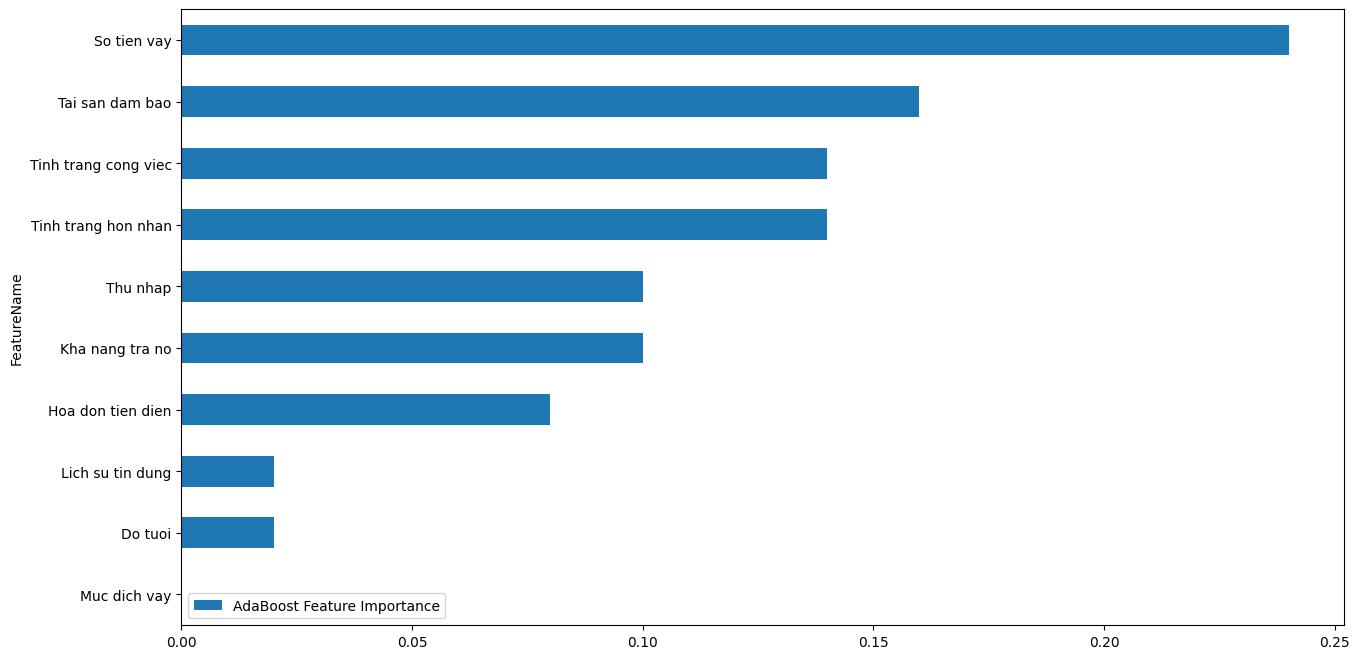

In [76]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

<ipython-input-35-f149c499526e>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-f149c499526e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


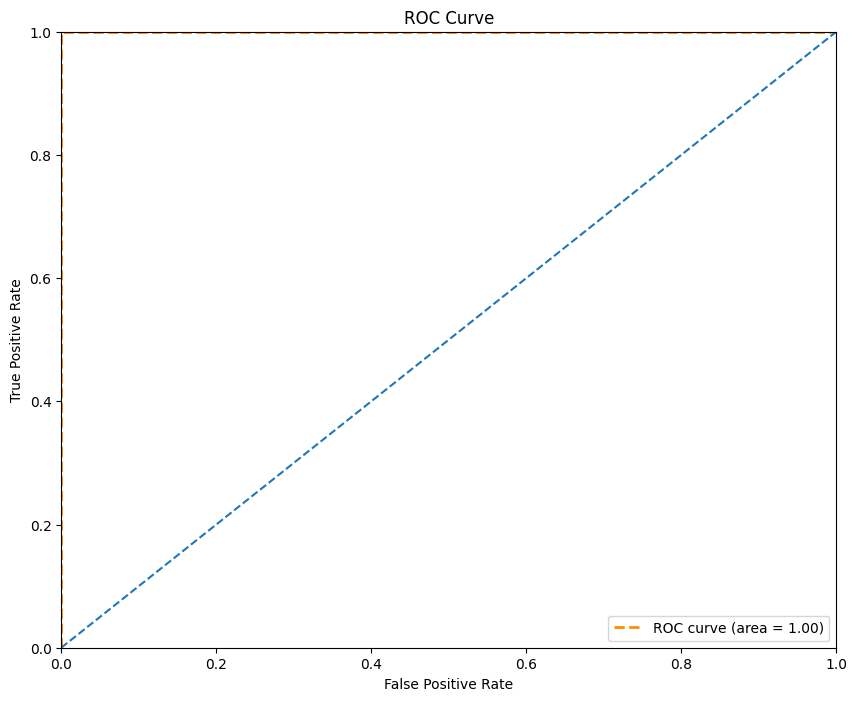

In [77]:
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

###**F. KNN**


In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình trên tập train
knn.fit(X_train, y_train)

# Đánh giá độ chính xác trên tập test
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# In kết quả độ chính xác
print("Accuracy KNN:", accuracy)

Accuracy KNN: 0.81


In [130]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       135
           1       0.90      0.74      0.81       165

    accuracy                           0.81       300
   macro avg       0.82      0.82      0.81       300
weighted avg       0.83      0.81      0.81       300



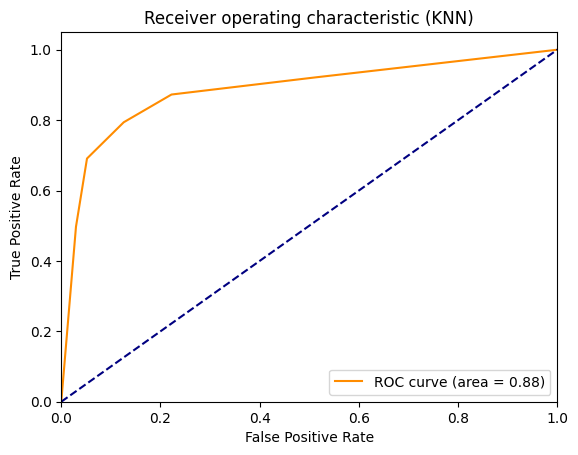

In [131]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Tạo một bộ dữ liệu giả
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình KNN
knn.fit(X_train, y_train)

# Dự đoán xác suất của lớp dương
y_score = knn.predict_proba(X_test)[:, 1]

# Tính đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()



# **5. COMPARING MODELS**

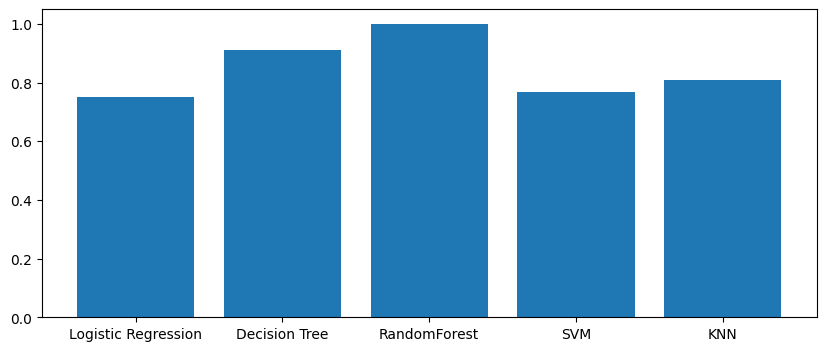

In [303]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
models = ['Logistic Regression','Decision Tree','RandomForest','SVM','KNN']
accuracy =  [0.75, 0.91, 1.00, 0.7686274509803922, 0.81]
plt.bar(models, accuracy)
plt.show()


# **6. RESAMPLING**

In [81]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


#### **A. Over-sampling**

In [83]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [84]:
X_train

array([[ 0.04446722,  0.91377162, -0.14972402, ...,  0.57407122,
        -0.66673831,  1.58983898],
       [ 0.41722807, -0.74594213,  0.6030946 , ..., -0.61453878,
         0.30463008,  0.75341946],
       [ 0.83868939,  0.86018264,  0.66388059, ...,  0.72508104,
        -1.17953018, -1.15545179],
       ...,
       [ 0.04091467,  0.42796263, -0.00235298, ..., -1.92277177,
        -0.17104772,  1.63925652],
       [ 0.3393792 , -0.64015446,  0.25253995, ..., -1.39922826,
        -0.52991248, -0.7348109 ],
       [ 1.84815207, -0.31305803,  1.78069642, ...,  0.60451533,
        -1.56102804, -1.25040773]])

In [85]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [86]:
X_train_over

array([[ 0.04446722,  0.91377162, -0.14972402, ...,  0.57407122,
        -0.66673831,  1.58983898],
       [ 0.41722807, -0.74594213,  0.6030946 , ..., -0.61453878,
         0.30463008,  0.75341946],
       [ 0.83868939,  0.86018264,  0.66388059, ...,  0.72508104,
        -1.17953018, -1.15545179],
       ...,
       [-0.68841323, -0.85449346, -0.60677213, ..., -0.05727041,
         0.76611409,  0.27223673],
       [-1.19445763, -1.09687508, -1.02072372, ...,  0.32403644,
         1.43408871,  0.87215311],
       [ 0.19281886, -0.89278752,  0.13488155, ..., -1.96850421,
        -0.32916768,  0.03471375]])

In [87]:
y_train_over

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [88]:
import pandas as pd

y_train_over_series = pd.Series(y_train_over)
print(y_train_over_series.value_counts())

0    366
1    366
dtype: int64


In [89]:
print('Predict on testing set')
classifier = LogisticRegression()
classifier.fit(X_train_over, y_train_over.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

Predict on testing set
[[115  20]
 [ 28 137]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       135
           1       0.87      0.83      0.85       165

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

Logistic Regression accuracy:  0.84


#### **B. Under-sampling**

In [90]:
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [91]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [92]:
X_train_under

array([[ 0.0626    ,  0.42009449, -0.10348878, ..., -1.13088844,
        -0.58807224,  2.05654356],
       [-0.29856694, -0.20698459,  0.1825609 , ..., -0.83698035,
         1.78856925,  0.82235047],
       [-0.04544437, -1.2681368 ,  0.28159353, ..., -1.74646673,
         1.10149779,  0.06837157],
       ...,
       [-2.4064155 , -0.05783661, -2.00757269, ..., -0.79345973,
         3.04872972,  0.11397067],
       [-1.36763799,  1.4622546 , -1.15491793, ...,  1.42876016,
         1.6870916 ,  1.0725418 ],
       [-1.51487603, -3.22101636, -1.3007438 , ..., -1.68087046,
         1.79851046,  0.03427181]])

In [93]:
y_train_under

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
import pandas as pd

y_train_under_series = pd.Series(y_train_under)
print(y_train_under_series.value_counts())

0    499
1    499
dtype: int64


In [95]:
classifier = LogisticRegression()
classifier.fit(X_train_under, y_train_under.ravel())

y_pred_train_under = classifier.predict(X_train_under)
print(confusion_matrix(y_train_under, y_pred_train_under))
print(classification_report(y_train_under, y_pred_train_under))
print('Logistic Regression accuracy: ', accuracy_score(y_train_under, y_pred_train_under))

[[433  66]
 [ 75 424]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       499
           1       0.87      0.85      0.86       499

    accuracy                           0.86       998
   macro avg       0.86      0.86      0.86       998
weighted avg       0.86      0.86      0.86       998

Logistic Regression accuracy:  0.8587174348697395


#### **C. Up-sampling**

In [96]:
from imblearn.over_sampling import SMOTE
# Upsampling
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

In [97]:
# Fit the Decision Tree classifier with X_train_over and y_train_over
DT_classifier.fit(X_train_over, y_train_over.ravel())

# Convert X_train_resample to NumPy array
# Skip the to_numpy() method if X_train_resample is already a NumPy array
X_train_resample = X_train_resample if type(X_train_resample) == np.ndarray else X_train_resample.to_numpy()

# Apply ravel() to y_train_resample
y_train_resample = y_train_resample.ravel()

# Fit the Decision Tree classifier with X_train_resample and y_train_resample
DT_classifier.fit(X_train_resample, y_train_resample)

# Predict the target variable with X_train_resample
y_pred = DT_classifier.predict(X_train_resample)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train_resample,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train_resample,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_train_resample, y_pred),4))

Confusion matrix:
     0    1
0  366    0
1    0  366 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       366

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732

Decision Tree accuracy:  1.0


In [98]:
# Đưa giá trị X_train_resample và y_train_resample vào mô hình Decision Tree (sau khi Upsampling)
DT_classifier.fit(X_train_over, y_train_over.ravel())
DT_classifier.fit(X_train_resample, y_train_resample.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
     0    1
0  116   19
1   24  141 

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       135
           1       0.88      0.85      0.87       165

    accuracy                           0.86       300
   macro avg       0.85      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Decision Tree accuracy:  0.8567


# **7. PREDICT NEW CUSTOMER**

In [305]:
new_data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/PredictNewData.xlsx')

In [306]:
new_data

,ID Khách hàng,Khả năng trả nợ,"Giới tính (0: Nam, 1: Nữ)",Hoá đơn tiền điện,Số tiền vay (triệu đồng),Thu nhập (triệu đồng/tháng),Mục đích vay,Tình trạng hôn nhân,Tình trạng công việc (năm),Độ tuổi khách hàng,Lịch sử tín dụng,Tài sản đảm bảo,Kỳ hạn vay (tháng)
0,1,0: Trả nợ đúng hạn,0,300000,300,32,5: Đầu tư chứng khoán,1: Độc Thân,6,28,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,18
1,2,1: Trả nợ trễ hạn,0,600000,120,14,1: Tiêu dùng,1: Độc Thân,3,26,2: Từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,12
2,3,0: Trả nợ đúng hạn,1,500000,500,80,2: Mua nhà,2: Có gia đình,8,32,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,24
3,4,0: Trả nợ đúng hạn,1,400000,40,8,4: Học tập,1: Độc Thân,2,24,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,12
4,5,1: Trả nợ trễ hạn,0,500000,150,20,5: Đầu tư chứng khoán,3: Ly hôn,2,32,2: Từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0: Trả nợ đúng hạn,0,600000,70,18,1: Tiêu dùng,1: Độc Thân,15,26,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,24
96,97,0: Trả nợ đúng hạn,0,600000,500,60,3: Mua xe,2: Có gia đình,7,28,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,12
97,98,0: Trả nợ đúng hạn,0,300000,100,32,5: Đầu tư chứng khoán,1: Độc Thân,8,25,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh,24
98,99,0: Trả nợ đúng hạn,1,400000,50,20,4: Học tập,3: Ly hôn,7,34,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo,18


In [307]:
new_data= new_data.drop(columns=['ID Khách hàng', 'Giới tính (0: Nam, 1: Nữ)','Kỳ hạn vay (tháng)'])

In [308]:
new_data=new_data.rename(columns = {'Khả năng trả nợ':'Kha nang tra no','Hoá đơn tiền điện':'Hoa don tien dien',
                        'Số tiền vay (triệu đồng)':'So tien vay','Thu nhập (triệu đồng/tháng)':'Thu nhap',
                        'Mục đích vay':'Muc dich vay','Tình trạng hôn nhân':'Tinh trang hon nhan',
                        'Tình trạng công việc (năm)':'Tinh trang cong viec','Độ tuổi khách hàng':'Do tuoi',
                        'Lịch sử tín dụng':'Lich su tin dung','Tài sản đảm bảo':'Tai san dam bao',
                        'Kỳ hạn vay (tháng)':'Ky han vay'
                       })
new_data.head(5)

,Kha nang tra no,Hoa don tien dien,So tien vay,Thu nhap,Muc dich vay,Tinh trang hon nhan,Tinh trang cong viec,Do tuoi,Lich su tin dung,Tai san dam bao
0,0: Trả nợ đúng hạn,300000,300,32,5: Đầu tư chứng khoán,1: Độc Thân,6,28,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh
1,1: Trả nợ trễ hạn,600000,120,14,1: Tiêu dùng,1: Độc Thân,3,26,2: Từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo
2,0: Trả nợ đúng hạn,500000,500,80,2: Mua nhà,2: Có gia đình,8,32,1: Chưa từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh
3,0: Trả nợ đúng hạn,400000,40,8,4: Học tập,1: Độc Thân,2,24,1: Chưa từng phát sinh NQH,3: Có 1 phần tài sản đảm bảo
4,1: Trả nợ trễ hạn,500000,150,20,5: Đầu tư chứng khoán,3: Ly hôn,2,32,2: Từng phát sinh NQH,2: Có đủ tài sản đảm bảo được bảo lãnh


In [296]:
for i in new_data.columns:
   new_data[i] = new_data[i].apply(lambda x: str(x).split(':')[0]) 
   new_data[i] = new_data[i].apply(lambda x: int(x))
new_data

,Kha nang tra no,Hoa don tien dien,So tien vay,Thu nhap,Muc dich vay,Tinh trang hon nhan,Tinh trang cong viec,Do tuoi,Lich su tin dung,Tai san dam bao
0,0,300000,300,32,5,1,6,28,1,2
1,1,600000,120,14,1,1,3,26,2,3
2,0,500000,500,80,2,2,8,32,1,2
3,0,400000,40,8,4,1,2,24,1,3
4,1,500000,150,20,5,3,2,32,2,2
...,...,...,...,...,...,...,...,...,...,...
95,0,600000,70,18,1,1,15,26,1,3
96,0,600000,500,60,3,2,7,28,1,2
97,0,300000,100,32,5,1,8,25,1,2
98,0,400000,50,20,4,3,7,34,1,3


In [297]:
new_data = pd.DataFrame(new_data)
new_data = new_data.to_numpy()

#### **A. Decision Tree**

In [298]:
prediction1 =DT_classifier.predict(new_data)
prediction1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### **B. Random Forest**

In [299]:
prediction2 = RF_classifier.predict(new_data)
prediction2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### **C. SVM**

In [288]:
prediction3 = SVM_classifier.predict(new_data)
prediction3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])